# Statistical Analysis in SAS

Now we are going to cover how to perform a variety of basic statistical tests in SAS.

* Proportion tests
* Chi-squared
* Fisher’s Exact Test
* Correlation
* T-tests/Rank-sum tests
* One-way ANOVA/Kruskal-Wallis
* Linear Regression
* Logistic Regression
* Poisson Regression

Note: We will be glossing over the statistical theory and “formulas” for these tests. There are plenty of resources online for learning more about these tests if you have not had a course covering this material. You will only be required to write code to fit or perform these test but will not be expected to interpret the results for this course.

## Proportion Tests

To conduct a test for one proportion, we can use PROC FREQ. To get this test, we use the BINOMIAL option in the TABLES statement. As options to BINOMIAL, we can specify

* p= - the null value for the hypothesis test
* level= - which group to use as a "success"
* CORRECT - uses a continuity correction for calculating the p-value (can be useful for small sample sizes)
* CL= - can select different types of CI such as WALD, EXACT, and LOGIT.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>In the following example, we use a summarized dataset, where we have the counts of the  "successes" and "failures". In this case, we are interested in the proportion of smokers, so we have a count of smokers and a count of non-smokers.</p>
</div>

In [7]:
DATA smoke;
   INPUT smkstatus $ count;
   DATALINES;
Y 15
N 17
;
RUN;

PROC FREQ data = smoke;
   TABLES smkstatus / binomial(p = 0.5 level = "Y" CORRECT) alpha = 0.05;
   WEIGHT count;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Note the use of the WEIGHT statement to specify the counts for Y and N. Without this statement SAS would read our data as having 1 Y and 1 N.</p>
    <p>The estimated proportion is 0.4688. The (asymptotic) 95% CI is (0.2802, 0.6573) and the two sided (continuity corrected) p-value for testing $H_0: p=0.5$ vs $H_a: p\neq 0.5$ is 0.8597.</p>
    <p>Alternatively, we could have had the data listed out for each individual as follows.</p>
</div>

In [10]:
DATA smoke2;
   DO i = 1 to 15;
      smkstatus = "Y";
      OUTPUT;
   END;
   DO i = 1 to 17;
      smkstatus = "N";
      OUTPUT;
   END;
   DROP i;
RUN;

PROC FREQ data = smoke2;
   TABLES smkstatus / binomial(p = 0.5 level = "Y" CORRECT) alpha = 0.05;
RUN;

## Chi-squared Test

To test for an association between two categorical variables, we could perform a chi-square test of independence. Again, we will use PROC FREQ with a tables statement. For 2x2 tables, a chi-square test is automatically performed, but for larger tables, we can request is by providing the CHISQ option to the tables statement. Another useful option to also specify is the EXPECTED option which provided the expected cell counts under the null hypothesis of independence. These expected cell counts are needed to assess whether or not the chi-square test is appropriate.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following example uses the Kaggle car auction dataset to test for an association between online sales and a car being a bad buy.</p>
</div>

In [14]:
FILENAME cardata '/folders/myfolders/SAS_Notes/data/kaggleCarAuction.csv';

PROC IMPORT datafile = cardata out = cars dbms = CSV replace;
   getnames = yes;
   guessingrows = 1000;
RUN;

PROC FREQ data = cars;
   TABLES isbadbuy*isonlinesale / chisq expected;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The chi-square test results in a p-value of 0.3178, or if we use the chi-square test with continuity correction, then we get a p-value of 0.3356.</p>
    <p>In the 2x2 case, as in this example, we may also want measures of effert such as the risk difference, relative risk and odds ratio. We can obtain these using the RISKDIFF, RELRISK, and OR options which will request all three measures with confidence intervals.</p>
</div>

In [16]:
PROC FREQ data = cars;
   TABLES isbadbuy*isonlinesale / RISKDIFF RELRISK OR;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>For the risk difference, SAS provides two tables that compare the conditional row proportions in the first column and the conditional row proportions in the second column. Similarly, for the relative risk, we get a relative risk for the first and the second column. This allows us to pick the one that matters to us depending on which column corresponds to the outcome of interest.</p>
</div>

## Fisher's Exact Test

An alternative way to test for an association between two categorical variables is Fisher's exact test. This test is a nonparametric test that makes no assumption other than that we have a random sample. Note, however, that this comes with a price. The more levels our variables have and the more observations we have will increase the computing time needed to perform this test. For 2x2 tables, this test is usally very quick, but for 5x5 tables, depending on how much data and what computer you are using, this test may take hours to complete.

For 2x2 tables, this test is automatically output. For larger tables, if you want this test, then you will need to specify the FISHER option in the TABLES statement.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following SAS program uses Fisher's exact test to test for an association between a car being a bad buy and buying the car online.</p>
</div>

In [17]:
PROC FREQ data = cars;
   TABLES isbadbuy*isonlinesale / FISHER;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The p-value for Fisher's exact test is 0.3324.</p>
</div>

## Correlation

SAS's CORR procedure can perform correlation analysis by providing both the parametric Pearson's correlation and the nonparametric Spearman's rank correlation coefficients and hypothesis tests. The default correlation output is Pearson's. To request the Spearman's rank correlation, add the SPREAMAN option to the PROC CORR statement.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>Let's look at some examples using PROC CORR using the Charm City Circulator bus ridership dataset. The following SAS program will find the Pearson correlation and hypothesis test results for the correlation between the average daily ridership between the orange and purple bus lines.</p>
</div>

In [21]:
FILENAME busdata '/folders/myfolders/SAS_Notes/data/Charm_City_Circulator_Ridership.csv';

PROC IMPORT datafile = busdata out = circ dbms = CSV replace;
   getnames = yes;
   guessingrows = 1000;
RUN;

PROC CORR data = circ;
  VAR orangeAverage purpleAverage;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>We can also get a correlation matrix for multiple variables at the same time. The following example also uses the NOMISS option to only use complete observations instead of pairwise complete observations when calculating the correlations. Here we get the correlation matrix between average ridership counts between all four of the orange, purple, banner, and green bus lines.</p>
</div>    

In [24]:
PROC CORR data = circ NOMISS;
   VAR orangeAverage purpleAverage greenAverage bannerAverage;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>If we don't want all pairwise correlations, but instead only specific pairs, then we can use the WITH statement as in the following example.</p>
</div>

In [25]:
PROC CORR data = circ NOMISS;
   VAR orangeAverage purpleAverage;
   WITH greenAverage bannerAverage;
RUN;

To get Spearman's rank correlation instead of Pearson's correlation, add the SPEARMAN option to the PROC CORR statement.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following SAS program produces Spearman's rank correlation coefficient and associated p-value for the hypothesis test of the correlation is 0 between the average daily ridership counts betwen the orange and purple bus lines.</p>
</div>

In [26]:
PROC CORR data = circ SPEARMAN;
  VAR orangeAverage purpleAverage;
RUN;

## T-Tests

T-tests can be performed in SAS with the TTEST procedure including

* one sample t-test
* paired t-test
* Two sample t-test

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>In this example, we will test if the average daily ridership on the orange bus line is greater than 3000 using a one sample t-test.</p>
</div>


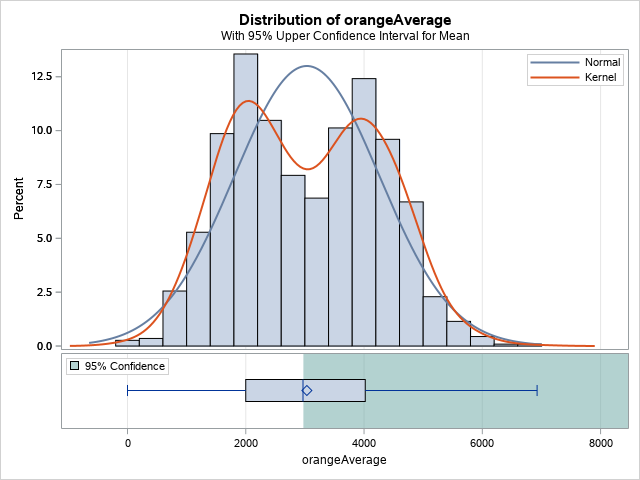
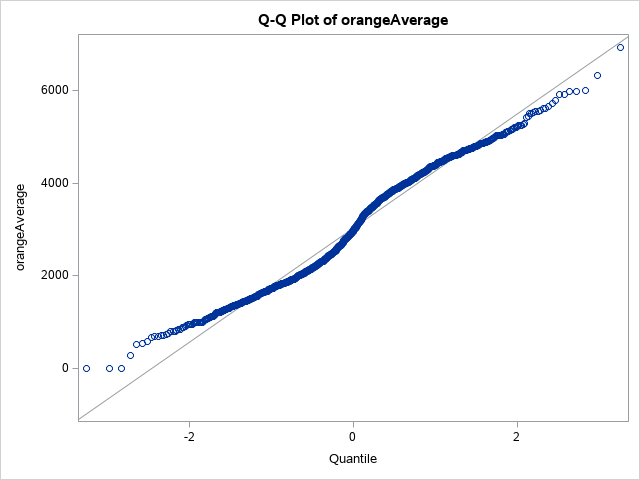

In [28]:
PROC TTEST data = circ H0 = 3000 SIDE = U;
   VAR orangeAverage;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The H0= option specifies the null value in the t-test and the SIDE= option specifies whether you want a less than (L), greater than (U), or not equal to (2) test. The default values are 0 for the null hypothesis value and two sided (2) for the alternative hypothesis. The output provides some summary statistics, the p-value for the test, confidence interval and a histogram and QQ plot to assess the normality assumption.</p>
    <p>From the output, we find the p-value to be 0.1814. Since we requested a one-side test, we get a one-sided confidence interval. To get our usual (two-sided) confidence interval, we need to request a two-sided test.</p>
</div>

For a two sample t-test, we need to have the data formatted in two columns:

* A data column that contains the quantitative data for both groups
* A grouping variable column that indicates the group for the data value in that row.

In PROC TTEST, we put the data variable in the VAR statement and the grouping variable in the CLASS statement to get a two sample t-test.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>In the following SAS program, we perform a two-sample t-test between the orange and purple bus lines' average ridership counts. We will first have to transform the data to meet the required data format for PROC TTEST.</p>
</div>


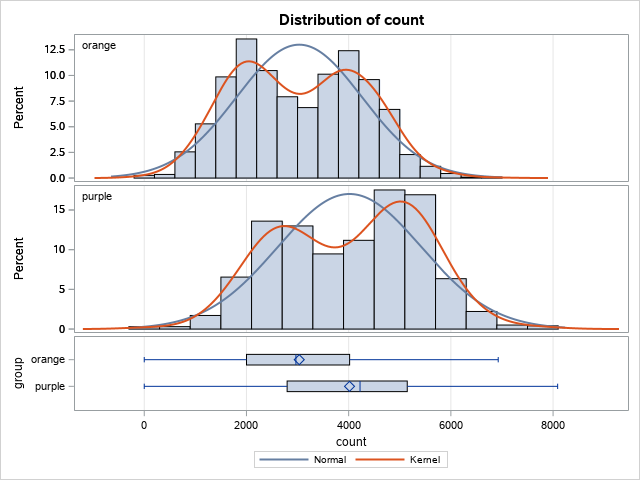
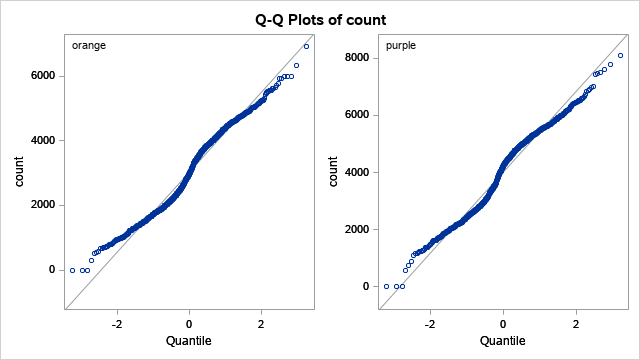

In [30]:
DATA circ_sub;
  SET circ;
  count = orangeAverage;
  group = "orange";
  OUTPUT;
  count = purpleAverage;
  group = "purple";
  OUTPUT;
  KEEP count group;
RUN;

PROC TTEST data = circ_sub;
  VAR count;
  CLASS group;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The SAS output contains summary statistics for each group, confidence intervals for each group mean, confidence intervals for the difference of the two means, hypothesis tests for the difference of the two means, and the F test for equality of variances. The Pooled row corresponds to the two sample t-test which assumes the population variances are equal between the two groups while the Satterthwaite assumes that the population variances are unequal.</p>
    <p>Note that the data here are really matched pairs data, since we have average ridership counts matched by date between the two bus lines. We will explore the paired t-test next.</p>
</div>

To perform a paired t-test, we need to use the PAIRED statement. In this case, SAS assumes the data from each group are in two separate columns where observations in the same row correspond to the matched pairs.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following SAS program performs a paired t-test betwen the average ridership counts between the orange and purple bus lines.</p>
</div>


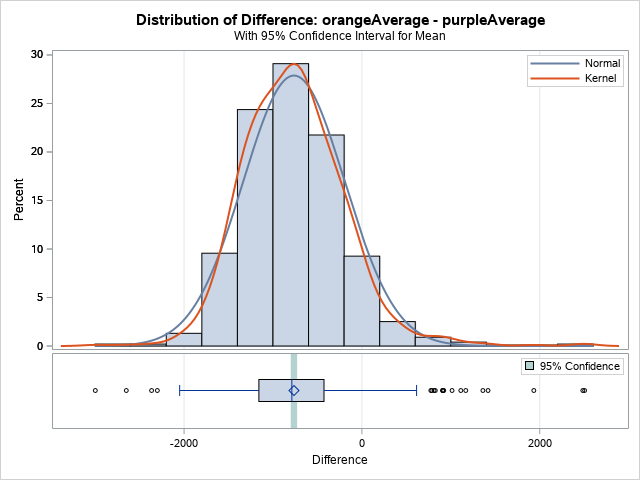
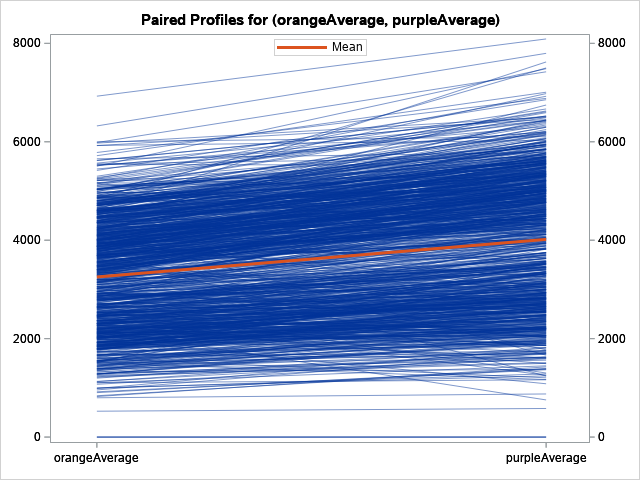
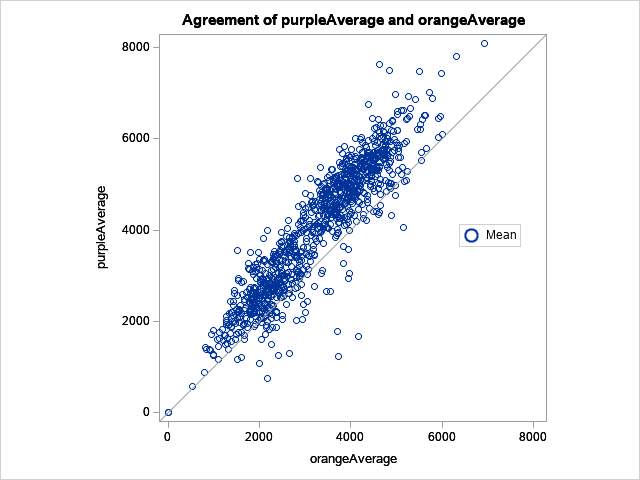
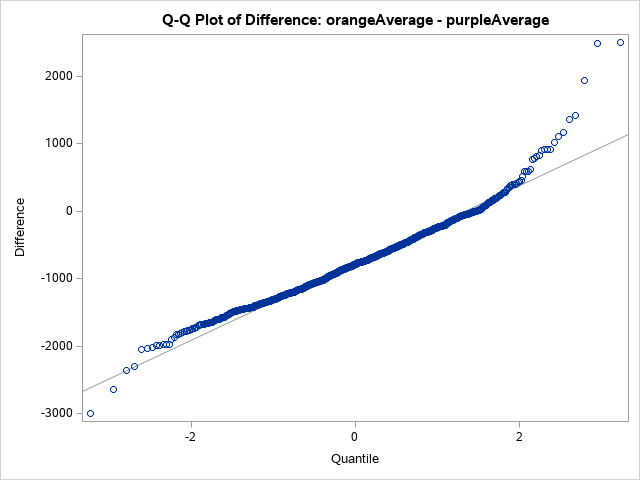

In [31]:
PROC TTEST data = circ;
   PAIRED orangeAverage*purpleAverage;
RUN;

## Nonparametric Alternatives to the T-Tests

In the case that we have a small sample size and the data cannot be assumed to be from populations that are Normally distributed, we need to use a nonparametric test. For the t-tests we have the following possible alternative tests:

* The sign test or the Wilcoxon signed rank test as alternative to the one sample t-test or the paired t-test.
* The Wilcoxon rank sum test as an alternative to the two sample t-test.

To perform a Wilcoxon rank sum test, we use PROC NPAR1WAY.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>In the following example, we use PROC NPAR1WAY to perform Wilcoxon rank sum test to compare median daily ridership counts between the orange and purple bus lines.</p>
</div>


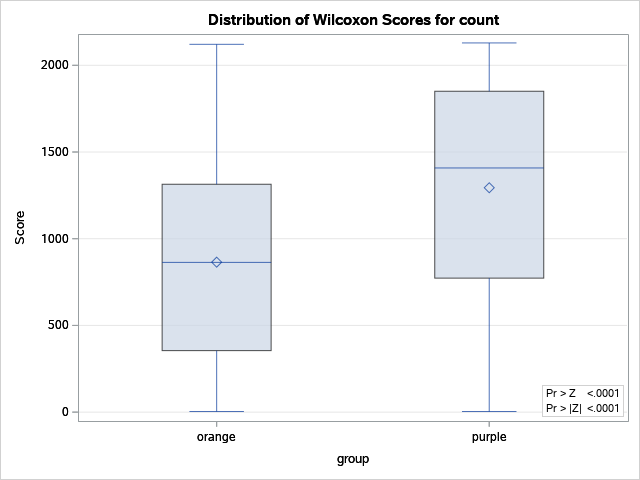

In [32]:
PROC NPAR1WAY data = circ_sub WILCOXON;
  VAR count;
  CLASS group;
RUN;

In order to perform a sign test or Wilcoxon signed rank test, we must first calculate the paired differences between the matched pairs, and then pass the differences to PROC UNIVARIATE.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following SAS program performs uses PROC UNIVARIATE to obtain the sign test and Wilcoxon signed rank test p-values for testing for a median difference in ridership counts between the orange and purple bus lines.</p>
</div>

In [33]:
DATA circ_diff;
  SET circ;
  diff = orangeAverage - purpleAverage;
RUN;

PROC UNIVARIATE data = circ_diff;
  VAR diff;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>PROC UNIVARIATE provides lots of default output. The p-values for the sign test and signed rank test can be found in the test for location table.</p>
</div>

## One-way ANOVA and the Kruskal-Wallis Test

When we wish to compare means between more than two independent groups, we can perform a one-way ANOVA or in the small sample case a Kruskal-Wallis test. A on-way ANOVA can be performed in SAS by using PROC GLM.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following SAS program performs a one-way ANOVA to test for equality of mean ridership counts between the orange, purple, and green bus lines.</p>
</div>


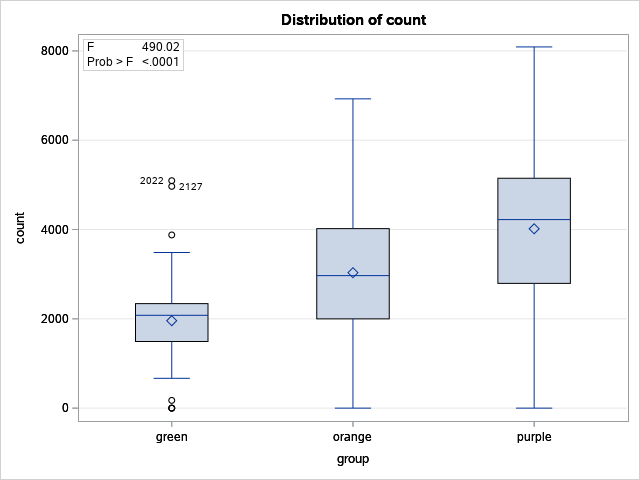

In [34]:
DATA circ_aov;
   SET circ;
   count = orangeAverage;
   group = "orange";
   OUTPUT;
   count = purpleAverage;
   group = "purple";
   OUTPUT;
   count = greenAverage;
   group = "green";
   OUTPUT;
   KEEP count group;
RUN;

PROC GLM data = circ_aov;
  CLASS group;
  MODEL count = group;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>If instead we wanted to perform a Kruskal-Wallis test, we would use PROC NPAR1WAY.</p>
</div>


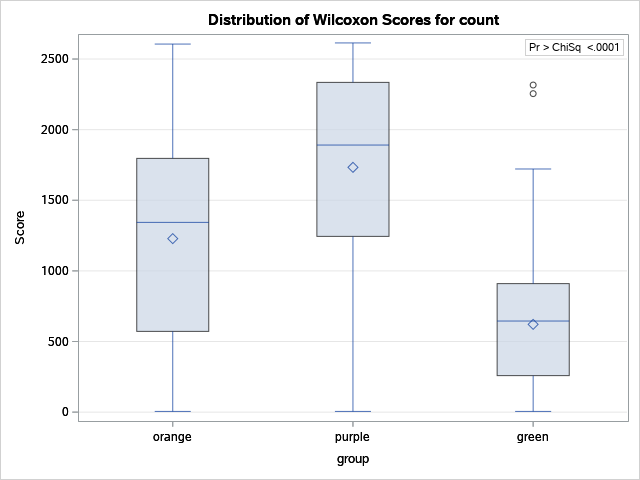

In [35]:
PROC NPAR1WAY data = circ_aov WILCOXON;
   CLASS group;
   VAR count;
RUN;

## Linear Regression

In SAS, there are two procedures that can be used to fit a linear regression model:

* PROC REG
* PROc GLM

PROC REG will give you most of the standard output, but the model statement requires all variables to be calculated in a prior DATA step, such as interaction terms. PROC GLM, however, allows you to calculate interaction terms on the fly in the MODEL statement. Generally, I prefer PROC GLM for this reason, but either PROC will work and can be used to get all the standard regression output.

Another reason I prefer PROC GLM over PROC REG is that PROC REG does not have a CLASS statement, so you must do all the dummy coding for categorical variables manually in a DATA step when using PROC REG.

Let's look at a few examples using both PROCs.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The first example fits a simple linear regression model with a single binary predictor. Note that in this case, the t-test for the slope is equivalent to a two sample t-test.</p>
</div>


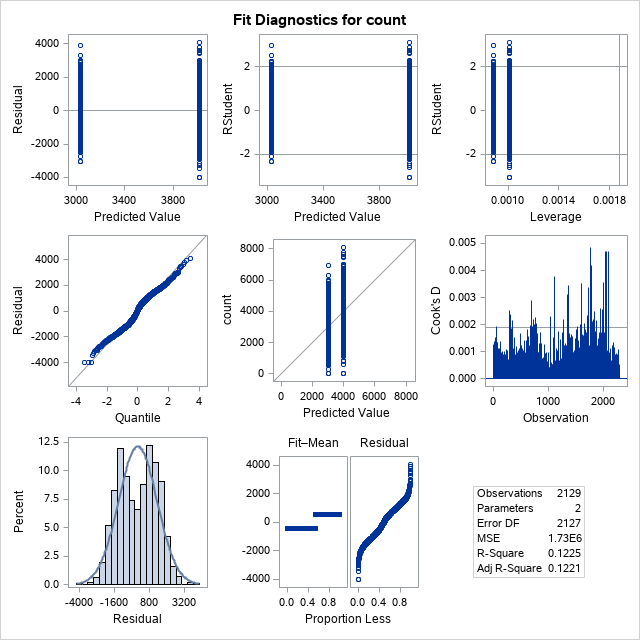
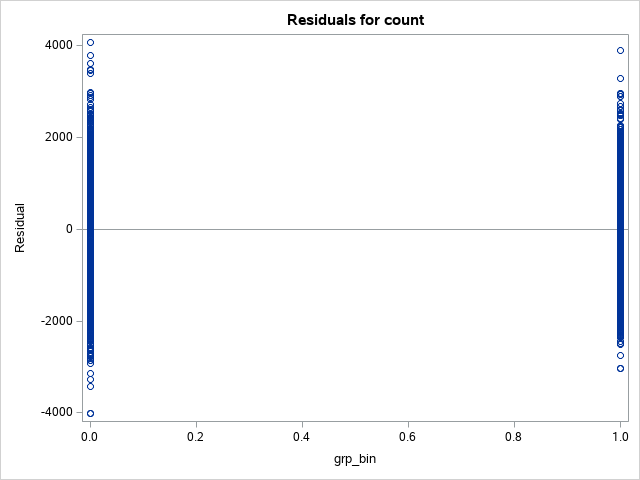
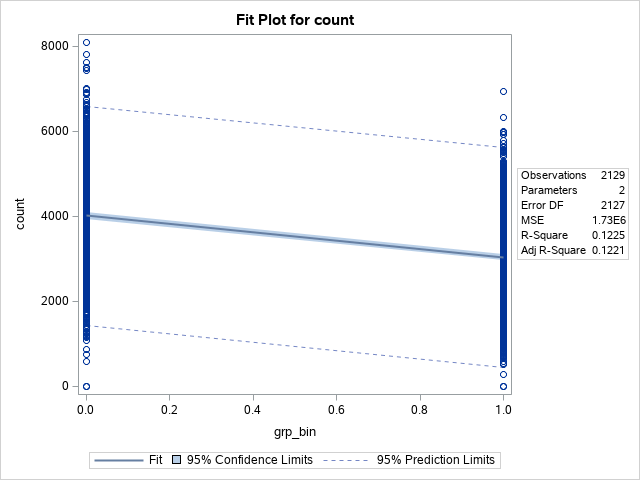

In [38]:
DATA circ_sub;
   SET circ_sub;
   IF group = "orange" THEN grp_bin = 1;
   ELSE grp_bin = 0;
RUN;

PROC REG data = circ_sub;
   MODEL count = grp_bin;
RUN;


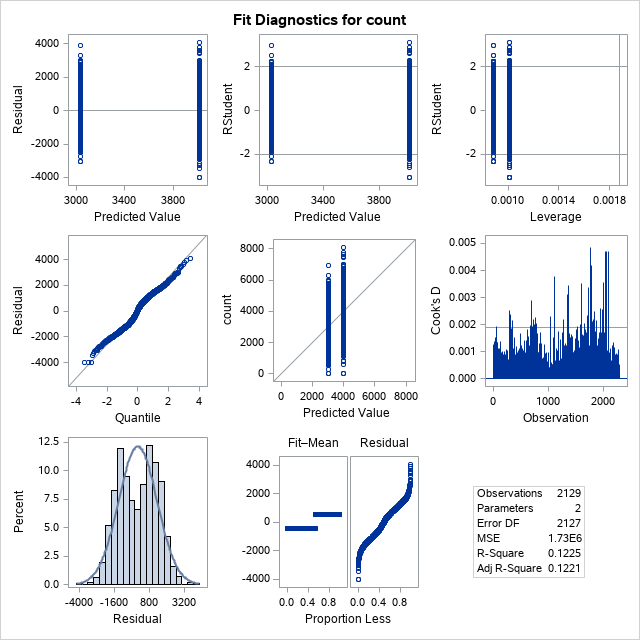
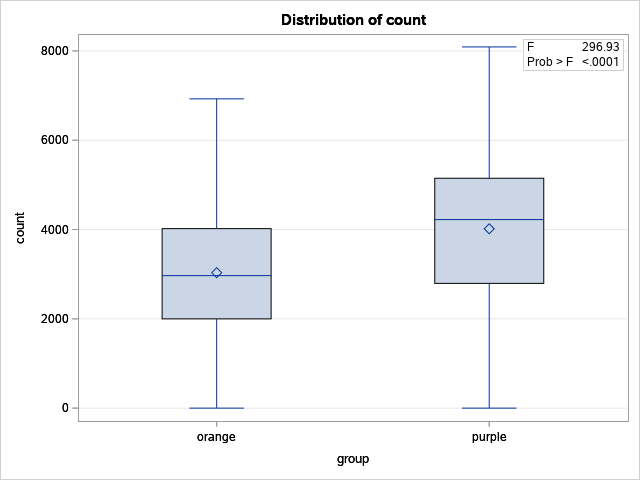

In [40]:
PROC GLM data = circ_sub PLOTS=DIAGNOSTICS;
  CLASS group(ref = 'purple');
  MODEL count = group / solution;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Note that we get the same output from both procedures, but with PROC REG we had to manually code the group variable as a 0/1 dummy variable, whereas in PROC GLM we could use the CLASS statement with a ref= statement to select the reference category. We also need to request the residual diagnostic plots in PROC GLM as this is not default output.</p>
</div>

Now that we have seen how to get the same output from both PROC GLM and PROC REG, we will use PROC GLM for all the remaining examples to avoid needing to use a DATA step to calculate dummy variables and interaction terms.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>In the following SAS program, we will fit linear regression models with more than one predictor using the Kaggle car auction dataset. First, let's fit a simple linear regression model and build on to it by adding more variables.</p>
</div>

In [41]:
PROC GLM data = cars;
   MODEL VehOdo = VehicleAge;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Now let's add another varialbe, in this case, the binary variable IsBadBuy. This variable is alread a 0/1 dummy variable, so we don't need to put it in a class statement (but we could if we wanted to and still get the same output by choosing the matching reference category).</p>
</div>

In [42]:
PROC GLM data = cars;
   MODEL VehOdo = VehicleAge IsBadBuy;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>Note that when adding multiple predictors in the MODEL statement, they are separated by a space instead of a + symbol. To add an interaction, we can create the individual interaction term using * for multiplication while still including the main effect terms or we can use the shorthand | to create all three at the same time.</p>
</div>

In [43]:
PROC GLM data = cars;
   MODEL VehOdo = VehicleAge IsBadBuy VehicleAge*IsBadBuy;
   *MODEL VehOdo = VehicleAge|IsBadBuy;
RUN;

To get the residuals and predicted values, use the OUTPUT statement. We can even get predicted values for new data by adding rows to the dataset and setting the response variable to missing.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>In the following example, we will extract the residuals and the predicted values using the OUTPUT statement. We will also add an additional new point to the dataset to get a new predicted value.</p>
</div>

Obs,IsBadBuy,VehicleAge,VehOdo,resid,fitted
72984,1,6,.,.,77549.27
72985,0,5,.,.,73543.88

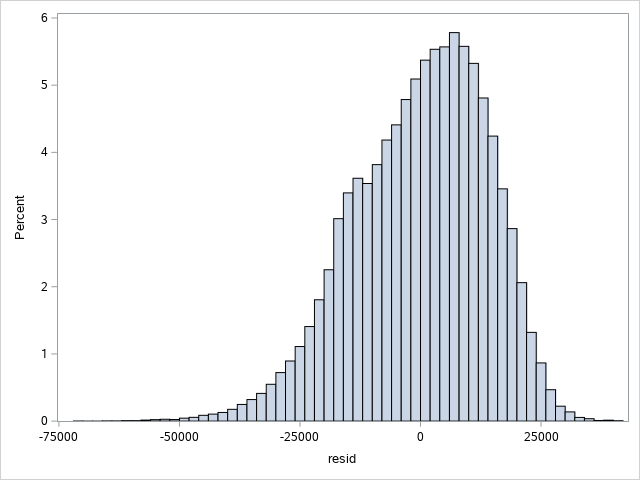

In [47]:
DATA new;
   INPUT VehOdo VehicleAge IsBadBuy;
   DATALINES;
. 6 1
. 5 0
;
RUN;

DATA cars_new;
   SET cars(keep = VehOdo VehicleAge IsBadBuy) 
       new;
RUN;

PROC GLM data = cars_new noprint;
   MODEL VehOdo = VehicleAge IsBadBuy VehicleAge*IsBadBuy;
   OUTPUT out=res_pred residuals = resid predicted = fitted;
RUN;

PROC SGPLOT data = res_pred;
   HISTOGRAM resid;
RUN;

PROC PRINT data = res_pred (FIRSTOBS=72984);
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The missing values for the response, VehOdo, in the new observations keep these rows from being used to fit the model, but since we have values for all the predictors in the model a predicted value is still calculated in the OUTPUT dataset. Recall, the predicted values are found by plugging in the predictor values into the fitted regression equation. For example, for the first new data value:</p>
    $$\widehat{y}=60139.7 + 1347.28 + 2680.84*6 -3.79*6=77549.28$$
</div>

## Logistic Regression

Generalized Linear Models (GLMs) allow for fitting regressions for non-continuous/normal outcomes. The glm has similar syntax to the lm command. Logistic regression is one example.

In a (simple) logistic regression model, we have a binary response Y and a predictor x. It is assumed that given the predictor, $Y\sim\text{Bernoulli(p(x))}$ where $p(x)=P(Y=1|x)$ and

$$\log\left(\dfrac{P(Y=1|x)}{1-P(Y=1|x)}\right)=\beta_0+\beta_1x$$

That is the log-odds of success changes linearly with x. It then follows that $e^{\beta_1}$ is the odds ratio of success for a one unit increase in x.

In SAS, there are two procedures that can be used to fit a logistic regression model

* PROC LOGISTIC
* PROC GENMOD

Generally, I use PROC LOGISTIC as it is made specifically for logistic regression and provides many extras that PROC GENMOD does not.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following example uses PROC LOGISTIC to fit a logistic regression model with IsBadBuy as the binary response and VehOdo and VehicleAge as predictors.</p>
</div>


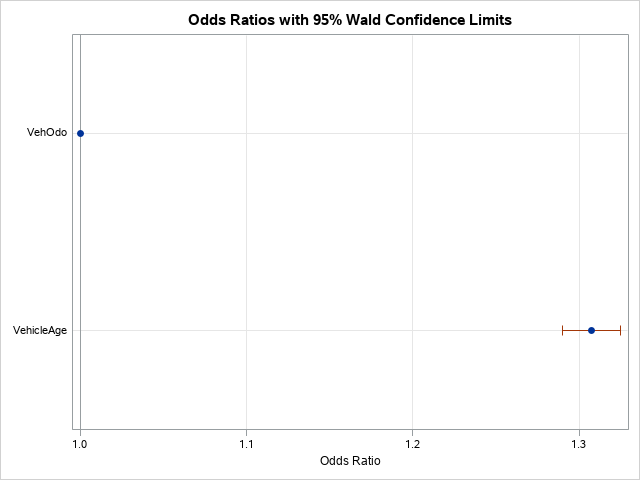

In [50]:
PROC LOGISTIC data = cars;
   MODEL isbadbuy(event='1') = vehodo vehicleage / CLPARM=WALD CLODDS=WALD;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>The CLPARM= and CLODDS= options request confidence intervals for the parameter estimates and corresponding odds ratios.</p>
</div>

## Poisson Regression

Poisson regression is used for count responses. This model assumes that (in the case of a single predictor) that $Y|x\sim\text{Poisson}(\lambda(x))$, where $\lambda(x)=E[Y|x]$, and for the case of a single predictor

$$\log(E[Y|x])=\beta_0+\beta_1x.$$

Then $e^{\beta_1}$ represents the rate ratio for a one unit increase in x. To fit such a model, we will use PROC GENMOD.

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <h3>Example</h3>
    <p>The following SAS program fits a Poisson regression model to the count response of the daily ridership count on the orange bus line with day of the week as the predictor.</p>
</div>

In [52]:
PROC GENMOD data = circ;
   CLASS day(ref='Friday');
   MODEL orangeBoardings = day / dist = Poisson link = log;
RUN;

<div style="background-color: rgb(255, 255, 255); border-bottom-color: rgb(59, 68, 79); border-bottom-left-radius: 8px; border-bottom-right-radius: 8px; border-bottom-style: none; border-bottom-width: 0px; border-left-color: rgb(77, 170, 160); border-left-style: solid; border-left-width: 4.5px; border-right-color: rgb(59, 68, 79); border-right-style: none; border-right-width: 0px; border-top-right-radius: 8px; border-top-left-radius: 8px; border-top-style: none; border-top-style: none; border-top-width: 0px; box-shadow: rgba(0, 0, 0, 0.1) 0px 4px 12px 0px; box-sizing: border-box; border-image-outset: 0; padding: 5px 8px 5px 8px;">
    <p>In the model statement, we need to specify the dist=Poisson option to specify that the response is assumed to be Poisson and that we are using the log link via the link=log option.</p>
    <p>In the case that an offset is desired in a Poisson regression model, we can use the OFFSET= option in the model statement. Note that when using this option, we must take the log() of the offset value ourselves.</p>
</div>

## Exercises

These exercises will use the child mortality dataset, indicatordeadkids35.csv, and the Kaggle car auction dataset, kaggleCarAuction.csv. Modify the following code to read in this dataset.

In [ ]:
FILENAME cardata '/folders/myfolders/SAS_Notes/data/kaggleCarAuction.csv';

PROC IMPORT datafile = cardata out = cars dbms = CSV replace;
   getnames = yes;
   guessingrows = 1000;
RUN;

FILENAME mortdat '/folders/myfolders/SAS_Notes/data/indicatordeadkids35.csv';

PROC IMPORT datafile = mortdat out = mort dbms = CSV replace;
   getnames = yes;
   guessingrows = 500;
RUN;

1. Compute the correlation between the `1980`, `1990`, `2000`, and `2010` mortality data. Just display the result to the screen. Then compute using the NOMMISS option. (Note: The column names are numbers, which are invalid standard SAS names, so to refer to the variable 1980 in your code use '1980'n.)
2. 
   a. Compute the correlation between the `Myanmar`, `China`, and `United States` mortality data. Store this correlation matrix in an object called `country_cor` using ODS OUTPUT.
   b. Extract the Myanmar-US correlation from the correlation matrix.
3. Is there a difference between mortality information from `1990` and `2000`? Run a paired t-test and a Wilcoxon signed rank test to assess this. Hint: to extract the column of information for `1990`, use '1990'n.
4. Using the cars dataset, fit a linear regression model with vehicle cost (`VehBCost`) as the outcome and vehicle age (`VehicleAge`) and whether it's an online sale (`IsOnlineSale`) as predictors as well as their interaction.
5. Create a variable called `expensive` in the `cars` data that indicates if the 
vehicle cost is over `$10,000`. Use a chi-squared test to assess if there is a
relationship between a car being expensive and it being labeled as a "bad buy" (`IsBadBuy`).
6. Fit a logistic regression model where the outcome is "bad buy" status and predictors are the `expensive` status and vehicle age (`VehicleAge`). Request confidence intervals for the odds ratios.